In [160]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [161]:
df = pd.read_csv("data/Assignment.csv")

In [162]:
df.head()

,Unnamed: 0,Customer ID,Quantity,Invoice Value,Date
0,0,500743788,0.0,0.0,2018-12-04
1,5,500019375,0.0,0.0,2018-12-01
2,15,500470078,0.0,0.0,2018-12-09
3,32,500009330,0.0,0.0,2018-12-01
4,37,500043924,0.0,0.0,2018-12-11


In [163]:
df.shape

(429550, 5)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429550 entries, 0 to 429549
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     429550 non-null  int64  
 1   Customer ID    429550 non-null  int64  
 2   Quantity       429550 non-null  float64
 3   Invoice Value  429550 non-null  float64
 4   Date           429550 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 16.4+ MB


In [165]:
df.describe()

,Unnamed: 0,Customer ID,Quantity,Invoice Value
count,4.295500e+05,4.295500e+05,429550.000000,429550.000000
mean,2.117060e+06,5.004040e+08,1.044103,38.615934
std,1.223596e+06,8.587085e+06,7.578686,285.082098
min,0.000000e+00,5.000000e+08,0.000000,-194.055000
25%,1.063264e+06,5.000391e+08,0.000000,0.000000
50%,2.116132e+06,5.000925e+08,0.000000,0.000000
75%,3.181854e+06,5.003989e+08,0.000000,0.000000
max,4.240876e+06,8.991026e+08,810.000000,28256.850000


In [166]:
# Converting date to datetime datatype and sorting values on basis of date.
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by = 'Date', inplace=True, ascending=True)

In [167]:
# reseting index after sorting values.
df.reset_index(inplace = True)

In [168]:
df.head()

,index,Unnamed: 0,Customer ID,Quantity,Invoice Value,Date
0,294275,2899673,500249347,0.0,0.000,2018-01-02
1,349484,3447013,500006647,1.0,33.715,2018-01-02
2,143520,1411531,500407469,1.0,33.715,2018-01-02
3,164624,1621422,500642846,0.0,0.000,2018-01-02
4,164625,1621425,500005450,1.0,33.715,2018-01-02


In [169]:
# Dropping Unused attributes.
df.drop(['index', 'Unnamed: 0'], inplace = True, axis = 1)

In [170]:
# Checking Null values.
df.isnull().sum()

Customer ID      0
Quantity         0
Invoice Value    0
Date             0
dtype: int64

In [171]:
# No of total outlets.
len(df['Customer ID'].unique())

4415

In [172]:
# Splitting into train and test data.
mask = (df.Date >= '2019-01-01')
test = df.loc[mask]

mask = (df.Date < '2019-01-01')
train = df.loc[mask]

In [173]:
train.tail()

,Customer ID,Quantity,Invoice Value,Date
342628,500108686,0.0,0.0,2018-12-30
342629,500635668,0.0,0.0,2018-12-30
342630,500709187,0.0,0.0,2018-12-30
342631,500098092,0.0,0.0,2018-12-30
342632,500082747,0.0,0.0,2018-12-30


In [174]:
test.head()

,Customer ID,Quantity,Invoice Value,Date
342633,500104838,0.0,0.000,2019-01-02
342634,500029116,1.0,43.635,2019-01-02
342635,500025978,2.0,87.270,2019-01-02
342636,500687583,1.0,43.635,2019-01-02
342637,500095254,6.0,301.110,2019-01-02


#### Data Analysis

In [175]:
# For one customer checking if there is any relation of Quantity with datetime.
OneCustData_tr = train[train['Customer ID'] == train['Customer ID'].values[0]]
OneCustData_ts = train[train['Customer ID'] == train['Customer ID'].values[0]]

In [176]:
OneCustData_tr.Timestamp = pd.to_datetime(OneCustData_tr.Date, format='%d-%m-%Y') 
OneCustData_tr.index = OneCustData_tr.Timestamp 

OneCustData_ts.Timestamp = pd.to_datetime(OneCustData_ts.Date, format='%d-%m-%Y') 
OneCustData_ts.index = OneCustData_ts.Timestamp 

In [177]:
OneCustData_tr.head()

,Customer ID,Quantity,Invoice Value,Date
Date,,,,
2018-01-02,500249347,0.0,0.00,2018-01-02
2018-01-05,500249347,0.0,0.00,2018-01-05
2018-01-09,500249347,0.0,0.00,2018-01-09
2018-01-12,500249347,2.0,67.44,2018-01-12
2018-01-16,500249347,0.0,0.00,2018-01-16


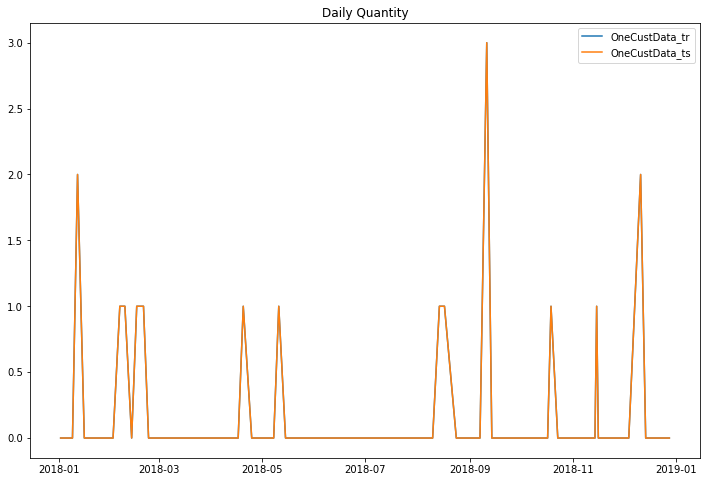

In [178]:
plt.figure(figsize = (12,8))
plt.plot(OneCustData_tr.index, OneCustData_tr['Quantity'], label = 'OneCustData_tr')
plt.plot(OneCustData_ts.index, OneCustData_ts['Quantity'], label = 'OneCustData_ts')
plt.legend(loc = 'best')
plt.title("Daily Quantity")
plt.show()

We can't find any pattern from the plot of Quantity with Datetime.

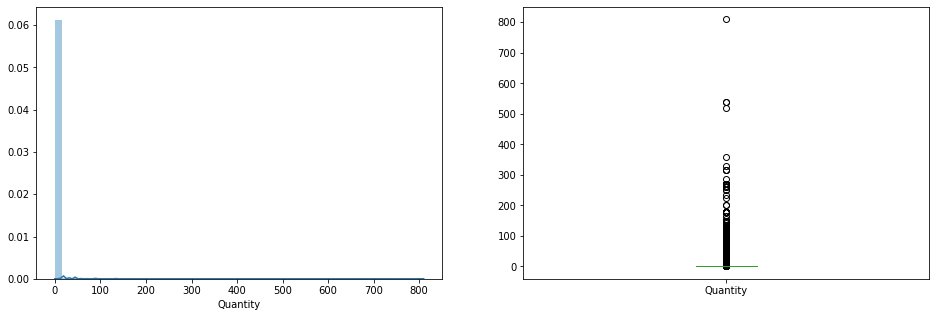

In [179]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Quantity'], kde_kws={'bw':0.1})
plt.subplot(122)
train['Quantity'].plot.box(figsize=(16,5))

In [180]:
for i in range(0,100,10):
    var = train["Quantity"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 1.0
90 percentile value is 2.0
100 percentile value is  809.5


In [181]:
for i in range(90,100):
    var = train["Quantity"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 2.0
91 percentile value is 2.0
92 percentile value is 2.0
93 percentile value is 2.0
94 percentile value is 3.0
95 percentile value is 4.0
96 percentile value is 5.0
97 percentile value is 5.0
98 percentile value is 10.0
99 percentile value is 15.0
100 percentile value is  809.5


Outliers are there in the Quantity attribute. we can see it has a high increase after 99th percentile.

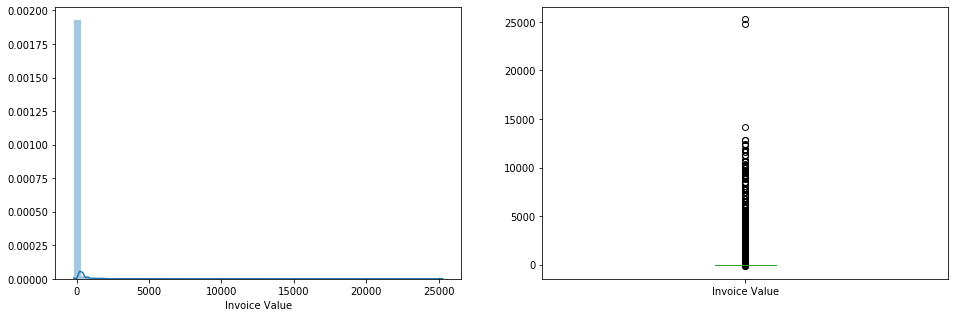

In [182]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Invoice Value'],  kde_kws={'bw':0.1})
plt.subplot(122)
train['Invoice Value'].plot.box(figsize=(16,5))

In [183]:
for i in range(0,100,10):
    var = train["Invoice Value"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -194.055
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 35.7
90 percentile value is 68.46
100 percentile value is  25268.54


In [184]:
for i in range(90,100):
    var = train["Invoice Value"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 68.46
91 percentile value is 75.89
92 percentile value is 80.0
93 percentile value is 87.27
94 percentile value is 107.09999999999997
95 percentile value is 125.85
96 percentile value is 156.07500000000005
97 percentile value is 198.35
98 percentile value is 276.6000000000001
99 percentile value is 466.55
100 percentile value is  25268.54


Outliers are there in the Invoice Value attribute also. we can see it has a high increase after 99th percentile.

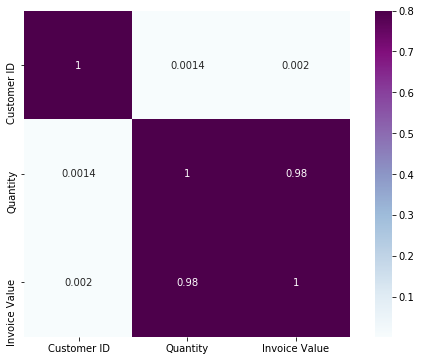

In [185]:
# Correlation Matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, annot=True, vmax=.8, square=True, cmap="BuPu")

* There is very much correlation between (Quantity, Invoice value) which is 0.98 . so, we can consider one attribute in pair in modelling which is Quantity.

#### Outlier Treatment

#### Select one of the techniques

In [186]:
# Outlier removal after 99th percentile
train = train[train.Quantity < 16]
test = test[test.Quantity < 16]

train = train[train['Invoice Value'] < 467]
test = test[test['Invoice Value'] < 467]

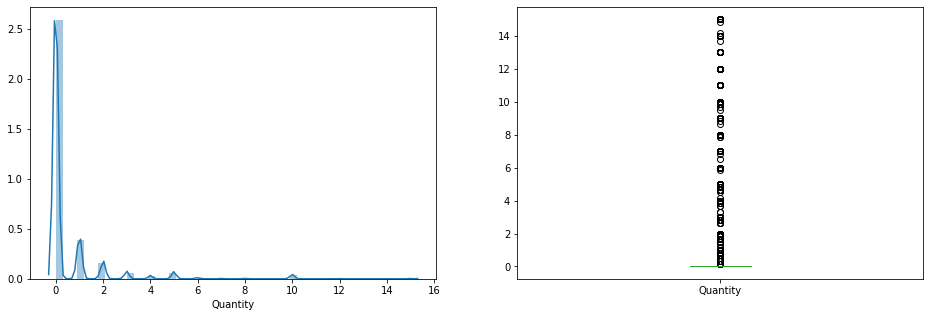

In [187]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Quantity'],  kde_kws={'bw':0.1})
plt.subplot(122)
train['Quantity'].plot.box(figsize=(16,5))

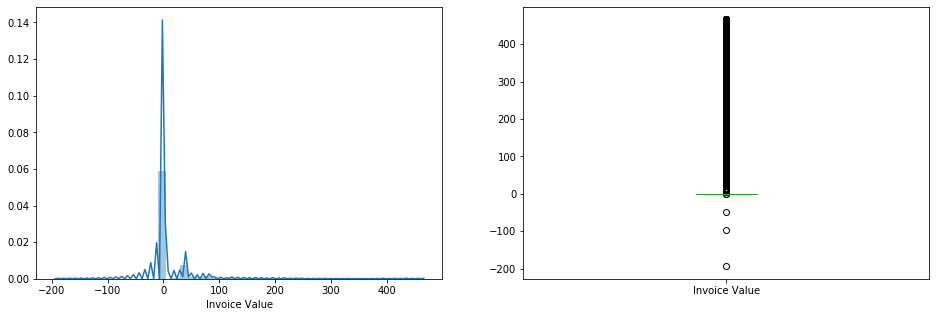

In [188]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Invoice Value'],  kde_kws={'bw':0.1})
plt.subplot(122)
train['Invoice Value'].plot.box(figsize=(16,5))

Distribution gets normal to great extent after removal of outliers.

#### Modelling

In [189]:
train.head()

,Customer ID,Quantity,Invoice Value,Date
0,500249347,0.0,0.000,2018-01-02
1,500006647,1.0,33.715,2018-01-02
2,500407469,1.0,33.715,2018-01-02
3,500642846,0.0,0.000,2018-01-02
4,500005450,1.0,33.715,2018-01-02


In [190]:
# Normalizing attributes values.
MIN_MAX_COL = col = ['Quantity', 'Invoice Value']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train[MIN_MAX_COL] = scaler.fit_transform(train[MIN_MAX_COL])
test[MIN_MAX_COL] = scaler.fit_transform(test[MIN_MAX_COL])

In [191]:
train.columns

Index(['Customer ID', 'Quantity', 'Invoice Value', 'Date'], dtype='object')

In [192]:
# Taking out columns for modelling.
col = ['Invoice Value']

In [193]:
X_train = train[col][:]
y_train = train['Quantity']

X_test = test[col][:]
y_test = test['Quantity']

In [194]:
from sklearn import metrics
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [195]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = 0#acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

#### Linear regression

In [196]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

rtp = linear.predict(X_test)

print(forecast_accuracy(np.array(rtp), np.array(y_test)))

for c, cc in enumerate(linear.coef_):
    print(X_train.columns[c])
    print(cc)

{'mape': inf, 'me': -0.342125283361407, 'mae': 0.3433244855983455, 'mpe': -inf, 'rmse': 0.3477992768610443, 'acf1': 0, 'corr': 0.991918325752279, 'minmax': inf}
Invoice Value
1.2502179602157375


In [197]:
y_hat = []
for i in y_test:
    if i > 0.5:
        y_hat.append(1)
    else:
        y_hat.append(0)
        
y_pred = []
for i in rtp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [198]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_hat, y_pred)*100))
print("Precision on test set: %0.3f%%"%(precision_score(y_hat, y_pred)*100))
print("Recall on test set: %0.3f%%"%(recall_score(y_hat, y_pred)*100))
print(classification_report(y_hat, y_pred))

Accuracy on test set: 99.873%
Precision on test set: 99.150%
Recall on test set: 92.904%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84155
           1       0.99      0.93      0.96      1381

    accuracy                           1.00     85536
   macro avg       1.00      0.96      0.98     85536
weighted avg       1.00      1.00      1.00     85536



#### Random Forest

In [199]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42, max_depth = 5)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [200]:
rf_rtp = rf_model.predict(X_test)
print(forecast_accuracy(np.array(rf_rtp), np.array(y_test)))

{'mape': nan, 'me': -0.028202305374094395, 'mae': 0.028486191986744718, 'mpe': nan, 'rmse': 0.0640320454880105, 'acf1': 0, 'corr': 0.868138798533282, 'minmax': nan}


In [201]:
y_pred = []
for i in rf_rtp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [202]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_hat, y_pred)*100))
print("Precision on test set: %0.3f%%"%(precision_score(y_hat, y_pred)*100))
print("Recall on test set: %0.3f%%"%(recall_score(y_hat, y_pred)*100))
print(classification_report(y_hat, y_pred))

Accuracy on test set: 99.874%
Precision on test set: 97.821%
Recall on test set: 94.280%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84155
           1       0.98      0.94      0.96      1381

    accuracy                           1.00     85536
   macro avg       0.99      0.97      0.98     85536
weighted avg       1.00      1.00      1.00     85536



#### Feature Engineering

In [203]:
# making new features using date.
datetime_df = pd.DataFrame(None , columns = ['day_of_week'])
datetime_df_test = pd.DataFrame(None , columns = ['day_of_week'])

In [204]:
datetime_df['day_of_week'] = train['Date'].apply(lambda x: x.weekday())

datetime_df.insert(0,'month',train['Date'].apply(lambda x:x.month))
datetime_df.insert(0,'day',train['Date'].apply(lambda x:x.day))
datetime_df.insert(0,'year',train['Date'].apply(lambda x:x.year))

datetime_df.insert(0,'week_start',datetime_df['day'].apply(lambda x: 1 if x == 0 or x ==1 else 0 ) )
datetime_df.insert(0,'week_end',datetime_df['day'].apply(lambda x: 1 if x == 5 or x ==6 else 0 ) )

datetime_df.insert(0,'quarter_start',train['Date'].apply(lambda x: 1 if x.is_quarter_start else 0 ) )
datetime_df.insert(0,'quarter_end',train['Date'].apply(lambda x: 1 if x.is_quarter_end else 0 ) )

datetime_df.insert(0,'year_start',train['Date'].apply(lambda x: 1 if x.is_year_start else 0 ) )
datetime_df.insert(0,'year_end',train['Date'].apply(lambda x: 1 if x.is_year_end else 0 ) )

In [205]:
datetime_df_test['day_of_week'] = test['Date'].apply(lambda x: x.weekday())

datetime_df_test.insert(0,'month',test['Date'].apply(lambda x:x.month))
datetime_df_test.insert(0,'day',test['Date'].apply(lambda x:x.day))
datetime_df_test.insert(0,'year',test['Date'].apply(lambda x:x.year))

datetime_df_test.insert(0,'week_start',datetime_df_test['day'].apply(lambda x: 1 if x == 0 or x ==1 else 0 ) )
datetime_df_test.insert(0,'week_end',datetime_df_test['day'].apply(lambda x: 1 if x == 5 or x ==6 else 0 ) )

datetime_df_test.insert(0,'quarter_start',test['Date'].apply(lambda x: 1 if x.is_quarter_start else 0 ) )
datetime_df_test.insert(0,'quarter_end',test['Date'].apply(lambda x: 1 if x.is_quarter_end else 0 ) )

datetime_df_test.insert(0,'year_start',test['Date'].apply(lambda x: 1 if x.is_year_start else 0 ) )
datetime_df_test.insert(0,'year_end',test['Date'].apply(lambda x: 1 if x.is_year_end else 0 ) )

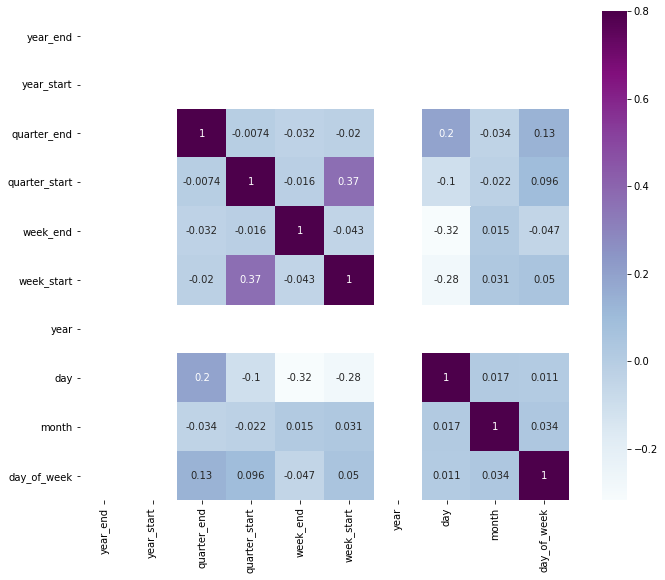

In [206]:
matrix = datetime_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(matrix, annot=True, vmax=.8, square=True, cmap="BuPu")

In [207]:
# Modifying the Peroidic attributes.
columns = ['day', 'month', 'day_of_week']
for col in columns:
    datetime_df[col+'_sin'] = np.sin((2*np.pi*datetime_df[col])/max(datetime_df[col]))
    datetime_df[col+'_cos'] = np.cos((2*np.pi*datetime_df[col])/max(datetime_df[col]))
    
for col in columns:
    datetime_df_test[col+'_sin'] = np.sin((2*np.pi*datetime_df_test[col])/max(datetime_df_test[col]))
    datetime_df_test[col+'_cos'] = np.cos((2*np.pi*datetime_df_test[col])/max(datetime_df_test[col]))

In [208]:
# Encoding the categorical variables.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

col = ['year']
lbl = LabelEncoder()
for c in col:
    datetime_df[c] = lbl.fit_transform(datetime_df[c])
    dumy = pd.get_dummies(datetime_df[c], prefix = c, sparse = False)
    datetime_df = pd.concat([datetime_df, dumy], axis = 1)
    
for c in col:
    datetime_df_test[c] = lbl.fit_transform(datetime_df_test[c])
    dumy = pd.get_dummies(datetime_df_test[c], prefix = c, sparse = False)
    datetime_df_test = pd.concat([datetime_df_test, dumy], axis = 1)

In [209]:
# Concatenating the datetime feature dataset with the orginal train test dataset resp.
train1 = pd.concat([train, datetime_df], axis = 1)
test1 = pd.concat([test, datetime_df_test], axis = 1)

In [210]:
train1.head()

,Customer ID,Quantity,Invoice Value,Date,year_end,year_start,quarter_end,quarter_start,week_end,week_start,...,day,month,day_of_week,day_sin,day_cos,month_sin,month_cos,day_of_week_sin,day_of_week_cos,year_0
0,500249347,0.000000,0.293753,2018-01-02,0,0,0,0,0,0,...,2,1,1,0.394356,0.918958,0.5,0.866025,0.866025,0.5,1
1,500006647,0.066667,0.344790,2018-01-02,0,0,0,0,0,0,...,2,1,1,0.394356,0.918958,0.5,0.866025,0.866025,0.5,1
2,500407469,0.066667,0.344790,2018-01-02,0,0,0,0,0,0,...,2,1,1,0.394356,0.918958,0.5,0.866025,0.866025,0.5,1
3,500642846,0.000000,0.293753,2018-01-02,0,0,0,0,0,0,...,2,1,1,0.394356,0.918958,0.5,0.866025,0.866025,0.5,1
4,500005450,0.066667,0.344790,2018-01-02,0,0,0,0,0,0,...,2,1,1,0.394356,0.918958,0.5,0.866025,0.866025,0.5,1


#### Modelling

In [211]:
train1.columns

Index(['Customer ID', 'Quantity', 'Invoice Value', 'Date', 'year_end',
       'year_start', 'quarter_end', 'quarter_start', 'week_end', 'week_start',
       'year', 'day', 'month', 'day_of_week', 'day_sin', 'day_cos',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'year_0'],
      dtype='object')

In [212]:
# Taking out columns for modeling.
col_u = [ 'Invoice Value', 'year_end', 'year_start', 'quarter_end', 'quarter_start',
          'week_end', 'week_start', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 
          'day_of_week_sin', 'day_of_week_cos', 'year_0']

In [213]:
X_train1 = train1[col_u][:]
y_train1 = train1['Quantity']

X_test1 = test1[col_u][:]
y_test1 = test1['Quantity']

In [214]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train1, y_train1)

rtp1 = linear.predict(X_test1)

print(forecast_accuracy(np.array(rtp1), np.array(y_test1)))

for c, cc in enumerate(linear.coef_):
    print(X_train1.columns[c])
    print(cc)

{'mape': inf, 'me': -0.34245503384646375, 'mae': 0.34367783045498806, 'mpe': -inf, 'rmse': 0.34818938366910535, 'acf1': 0, 'corr': 0.9917855798429813, 'minmax': inf}
Invoice Value
1.2523135767482163
year_end
-5.637851296924623e-17
year_start
-1.0299920638612292e-18
quarter_end
1.9451637322578285e-05
quarter_start
-0.0006174007097965874
week_end
0.0001812273427885167
week_start
-9.799736245538686e-05
day_sin
0.0003550249693896251
day_cos
-0.00010348358151179043
month_sin
0.0032070248171729787
month_cos
-0.001761491569227668
day_of_week_sin
-5.032097383595629e-05
day_of_week_cos
0.0001039390892212762
year_0
0.0


In [215]:
y_hat = []
for i in y_test1:
    if i > 0.5:
        y_hat.append(1)
    else:
        y_hat.append(0)
        
y_pred = []
for i in rtp1:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [216]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_hat, y_pred)*100))
print("Precision on test set: %0.3f%%"%(precision_score(y_hat, y_pred)*100))
print("Recall on test set: %0.3f%%"%(recall_score(y_hat, y_pred)*100))
print(classification_report(y_hat, y_pred))

Accuracy on test set: 99.871%
Precision on test set: 99.073%
Recall on test set: 92.904%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84155
           1       0.99      0.93      0.96      1381

    accuracy                           1.00     85536
   macro avg       0.99      0.96      0.98     85536
weighted avg       1.00      1.00      1.00     85536



In [217]:
from sklearn.ensemble import RandomForestRegressor
rf_model1 = RandomForestRegressor(random_state = 42, max_depth = 5)
rf_model1.fit(X_train1,y_train1)

RandomForestRegressor(max_depth=5, random_state=42)

In [218]:
rf_rtp1 = rf_model1.predict(X_test1)
print(forecast_accuracy(np.array(rf_rtp1), np.array(y_test1)))

{'mape': nan, 'me': -0.02821345486141843, 'mae': 0.028687445910487122, 'mpe': nan, 'rmse': 0.0643869300766445, 'acf1': 0, 'corr': 0.8655356972730845, 'minmax': nan}


In [219]:
y_pred = []
for i in rf_rtp1:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [220]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_hat, y_pred)*100))
print("Precision on test set: %0.3f%%"%(precision_score(y_hat, y_pred)*100))
print("Recall on test set: %0.3f%%"%(recall_score(y_hat, y_pred)*100))
print(classification_report(y_hat, y_pred))

Accuracy on test set: 99.867%
Precision on test set: 98.102%
Recall on test set: 93.555%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84155
           1       0.98      0.94      0.96      1381

    accuracy                           1.00     85536
   macro avg       0.99      0.97      0.98     85536
weighted avg       1.00      1.00      1.00     85536



In [221]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model_name", "Rmse"]
x.add_row(["Linear regression", 0.34])
x.add_row(["Random Forest", 0.064])
print(x)

+-------------------+-------+
|     Model_name    |  Rmse |
+-------------------+-------+
| Linear regression |  0.34 |
|   Random Forest   | 0.064 |
+-------------------+-------+


In [222]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model_name", "Precision%", "Recall%", "Accuracy%"]
x.add_row(["Linear regression", 99.073, 92.904, 99.871])
x.add_row(["Random Forest", 98.102, 93.555, 99.867])
print(x)

+-------------------+------------+---------+-----------+
|     Model_name    | Precision% | Recall% | Accuracy% |
+-------------------+------------+---------+-----------+
| Linear regression |   99.073   |  92.904 |   99.871  |
|   Random Forest   |   98.102   |  93.555 |   99.867  |
+-------------------+------------+---------+-----------+


#### Feature Engineering

In [223]:
day_df = train.groupby(['Date']).agg({'Invoice Value':'mean',\
                          'Quantity':['sum','mean']}).reset_index()

day_df_ts = test.groupby(['Date']).agg({'Invoice Value':'mean',\
                          'Quantity':['sum','mean']}).reset_index()

In [224]:
day_df

Date Invoice Value   Quantity          
                        mean        sum      mean
0   2018-01-02      0.331408  14.533333  0.055683
1   2018-01-03      0.319121  37.855533  0.036753
2   2018-01-04      0.323874  50.266667  0.043901
3   2018-01-05      0.328397  55.666667  0.049350
4   2018-01-06      0.321432  50.255533  0.040726
..         ...           ...        ...       ...
294 2018-12-26      0.333898  66.200000  0.042572
295 2018-12-27      0.340222  68.355533  0.049895
296 2018-12-28      0.341166  67.311067  0.050420
297 2018-12-29      0.344795  84.266667  0.054226
298 2018-12-30      0.340222  73.333333  0.048954

[299 rows x 4 columns]

In [225]:
day_df.columns = ['_'.join(x) if len(x)>1 else x[0] for x in day_df.columns ]
day_df_ts.columns = ['_'.join(x) if len(x)>1 else x[0] for x in day_df_ts.columns ]

In [226]:
day_df.head()

,Date_,Invoice Value_mean,Quantity_sum,Quantity_mean
0,2018-01-02,0.331408,14.533333,0.055683
1,2018-01-03,0.319121,37.855533,0.036753
2,2018-01-04,0.323874,50.266667,0.043901
3,2018-01-05,0.328397,55.666667,0.049350
4,2018-01-06,0.321432,50.255533,0.040726


In [227]:
day_df['day'] = pd.to_datetime(day_df['Date_']).dt.day
day_df['month'] = pd.to_datetime(day_df['Date_']).dt.month
day_df['year'] = pd.to_datetime(day_df['Date_']).dt.year

day_df_ts['day'] = pd.to_datetime(day_df_ts['Date_']).dt.day
day_df_ts['month'] = pd.to_datetime(day_df_ts['Date_']).dt.month
day_df_ts['year'] = pd.to_datetime(day_df_ts['Date_']).dt.year

In [228]:
day_df['lag_1'] = day_df.groupby(['month','year'])['Quantity_mean'].shift(1)
day_df_ts['lag_1'] = day_df_ts.groupby(['month','year'])['Quantity_mean'].shift(1)

In [229]:
day_df['dt_date'] = pd.to_datetime(day_df['Date_'])
day_df_ts['dt_date'] = pd.to_datetime(day_df_ts['Date_'])

In [230]:
day_df.sort_values(by=['dt_date'], inplace=True)
day_df_ts.sort_values(by=['dt_date'], inplace=True)

In [231]:
LAG_COL = []
for i in range(2,23):
  col_name = 'lag_'+str(i)
  temp = day_df.groupby(['month','year'])['Quantity_mean'].\
                      rolling(window =i, min_periods=1).mean().reset_index()
  temp.sort_values(by=['year','month'], inplace=True)
  temp['new_mean'] = temp.groupby(['month','year'])['Quantity_mean'].shift(1)
  temp = temp.set_index('level_2')
  day_df[col_name] = temp['new_mean']
  LAG_COL.append(col_name)

In [232]:
LAG_COL_ts = []
for i in range(2,23):
  col_name = 'lag_'+str(i)
  temp = day_df_ts.groupby(['month','year'])['Quantity_mean'].\
                      rolling(window =i, min_periods=1).mean().reset_index()
  temp.sort_values(by=['year','month'], inplace=True)
  temp['new_mean'] = temp.groupby(['month','year'])['Quantity_mean'].shift(1)
  temp = temp.set_index('level_2')
  day_df_ts[col_name] = temp['new_mean']
  LAG_COL_ts.append(col_name)

In [233]:
day_df.columns

Index(['Date_', 'Invoice Value_mean', 'Quantity_sum', 'Quantity_mean', 'day',
       'month', 'year', 'lag_1', 'dt_date', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12',
       'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19',
       'lag_20', 'lag_21', 'lag_22'],
      dtype='object')

In [234]:
day_df_ts.columns

Index(['Date_', 'Invoice Value_mean', 'Quantity_sum', 'Quantity_mean', 'day',
       'month', 'year', 'lag_1', 'dt_date', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12',
       'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19',
       'lag_20', 'lag_21', 'lag_22'],
      dtype='object')

In [235]:
req_merge = day_df[['Quantity_mean', 'Invoice Value_mean',
       'day', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22','Date_']]

In [236]:
req_merge_ts = day_df_ts[['Quantity_mean', 'Invoice Value_mean',
       'day', 'month', 'year', 'lag_1',
       'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22','Date_']]

In [237]:
req_merge.head()

,Quantity_mean,Invoice Value_mean,day,month,year,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,Date_
0,0.055683,0.331408,2,1,2018,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-02
1,0.036753,0.319121,3,1,2018,0.055683,0.055683,0.055683,0.055683,0.055683,...,0.055683,0.055683,0.055683,0.055683,0.055683,0.055683,0.055683,0.055683,0.055683,2018-01-03
2,0.043901,0.323874,4,1,2018,0.036753,0.046218,0.046218,0.046218,0.046218,...,0.046218,0.046218,0.046218,0.046218,0.046218,0.046218,0.046218,0.046218,0.046218,2018-01-04
3,0.049350,0.328397,5,1,2018,0.043901,0.040327,0.045446,0.045446,0.045446,...,0.045446,0.045446,0.045446,0.045446,0.045446,0.045446,0.045446,0.045446,0.045446,2018-01-05
4,0.040726,0.321432,6,1,2018,0.049350,0.046625,0.043335,0.046422,0.046422,...,0.046422,0.046422,0.046422,0.046422,0.046422,0.046422,0.046422,0.046422,0.046422,2018-01-06


In [238]:
train2 = pd.merge(train1, req_merge, left_on = ['Date'], right_on=['Date_'])
test2 = pd.merge(test1, req_merge_ts, left_on = ['Date'], right_on=['Date_'])

In [239]:
train2['Invoice_Value_ratio'] = train2['Invoice Value']/train2['Invoice Value_mean']
test2['Invoice_Value_ratio'] = test2['Invoice Value']/test2['Invoice Value_mean']

In [240]:
train_2 = train2.copy()
test_2 = test2.copy()

In [241]:
train_2.columns

Index(['Customer ID', 'Quantity', 'Invoice Value', 'Date', 'year_end',
       'year_start', 'quarter_end', 'quarter_start', 'week_end', 'week_start',
       'year_x', 'day_x', 'month_x', 'day_of_week', 'day_sin', 'day_cos',
       'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos',
       'year_0', 'Quantity_mean', 'Invoice Value_mean', 'day_y', 'month_y',
       'year_y', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7',
       'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14',
       'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21',
       'lag_22', 'Date_', 'Invoice_Value_ratio'],
      dtype='object')

In [242]:
train_2.drop(['Date','Date_','Quantity_mean','day_y','month_y','year_y'], axis=1, inplace=True)
test_2.drop(['Date','Date_','Quantity_mean','day_y','month_y','year_y'], axis=1, inplace=True)

In [243]:
train_2.rename(columns={'year_x':'year','month_x':'month','day_x':'day'},inplace=True)
test_2.rename(columns={'year_x':'year','month_x':'month','day_x':'day'},inplace=True)

In [244]:
bin_labels_5 = ['Winter', 'Spring', 'Summer', 'Fall']
train_2['season'] = pd.cut(train_2['month'],bins=[1,2, 5,8,11],labels=bin_labels_5)
train_2['season'] = train_2['season'].fillna('Winter')

bin_labels_3 = ['beg', 'mid', 'end']
train_2['month_time'] = pd.cut(train_2['month'],bins=[0,7,24,31],labels=bin_labels_3)

bin_labels_2 = ['weekdays', 'weekend']
train_2['week_time'] = pd.cut(train_2['day_of_week'],bins=[-1,4,6],labels=bin_labels_2)


bin_labels_5 = ['Winter', 'Spring', 'Summer', 'Fall']
test_2['season'] = pd.cut(test_2['month'],bins=[1,2, 5,8,11],labels=bin_labels_5)
test_2['season'] = test_2['season'].fillna('Winter')

bin_labels_3 = ['beg', 'mid', 'end']
test_2['month_time'] = pd.cut(test_2['month'],bins=[0,7,24,31],labels=bin_labels_3)

bin_labels_2 = ['weekdays', 'weekend']
test_2['week_time'] = pd.cut(test_2['day_of_week'],bins=[-1,4,6],labels=bin_labels_2)

In [245]:
from sklearn.preprocessing import LabelEncoder
col=['season','month_time', 'week_time']
lbl = LabelEncoder()
for c in col:
    if c!='var2':
        train_2[c] = lbl.fit_transform(train_2[c])
    else:
        train_2[c] = lbl.fit_transform(train_2[c])
        dumy = pd.get_dummies(train_2[c],prefix=c)
        train_2 = pd.concat([train_2,dumy],axis=1)
        train_2 = train_2.drop(c,axis=1)
    
dumy = pd.get_dummies(train_2['year'],prefix='year')
train_2 = pd.concat([train_2,dumy],axis=1)
train_2 = train_2.drop('year',axis=1)

In [246]:
from sklearn.preprocessing import LabelEncoder
col=['season','month_time', 'week_time']
lbl = LabelEncoder()
for c in col:
    if c!='var2':
        test_2[c] = lbl.fit_transform(test_2[c])
    else:
        test_2[c] = lbl.fit_transform(test_2[c])
        dumy = pd.get_dummies(test_2[c],prefix=c)
        test_2 = pd.concat([test_2,dumy],axis=1)
        test_2 = test_2.drop(c,axis=1)
    
dumy = pd.get_dummies(test_2['year'],prefix='year')
test_2 = pd.concat([test_2,dumy],axis=1)
test_2 = test_2.drop('year',axis=1)

In [247]:
columns=['month_time','season','week_time']
for col in columns:
    train_2[col+'_sin']=np.sin((2*np.pi*train_2[col])/max(train_2[col]))
    train_2[col+'_cos']=np.cos((2*np.pi*train_2[col])/max(train_2[col]))
train_2=train_2.drop(columns,axis=1)

columns=['month_time','season','week_time']
for col in columns:
    test_2[col+'_sin']=np.sin((2*np.pi*test_2[col])/max(test_2[col]))
    test_2[col+'_cos']=np.cos((2*np.pi*test_2[col])/max(test_2[col]))
test_2=test_2.drop(columns,axis=1)

In [248]:
train_2.replace({np.inf:0,-np.inf:0}, inplace=True)
test_2.replace({np.inf:0,-np.inf:0}, inplace=True)

In [249]:
train_2.replace(np.nan, 0, inplace = True)
test_2.replace(np.nan, 0, inplace = True)

In [250]:
train_2.columns

Index(['Customer ID', 'Quantity', 'Invoice Value', 'year_end', 'year_start',
       'quarter_end', 'quarter_start', 'week_end', 'week_start', 'day',
       'month', 'day_of_week', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos', 'year_0', 'Invoice Value_mean',
       'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15',
       'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22',
       'Invoice_Value_ratio', 'year_0', 'month_time_sin', 'month_time_cos',
       'season_sin', 'season_cos', 'week_time_sin', 'week_time_cos'],
      dtype='object')

In [251]:
col_u2 = ['Invoice Value', 'year_end', 'year_start',
       'quarter_end', 'quarter_start', 'week_end', 'week_start', 'day',
       'month', 'day_of_week', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
       'day_of_week_sin', 'day_of_week_cos', 'year_0', 'Invoice Value_mean',
       'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15',
       'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22',
       'Invoice_Value_ratio', 'year_0', 'month_time_sin', 'month_time_cos',
       'season_sin', 'season_cos', 'week_time_sin', 'week_time_cos']

In [252]:
X_train2 = train_2[col_u2][:]
y_train2 = train_2['Quantity']

X_test2 = test_2[col_u2][:]
y_test2 = test_2['Quantity']

In [159]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train2, y_train2)

rtp2 = linear.predict(X_test2)

print(forecast_accuracy(np.array(rtp2), np.array(y_test2)))

for c, cc in enumerate(linear.coef_):
    print(X_train2.columns[c])
    print(cc)

MemoryError: Unable to allocate 135. MiB for an array with shape (52, 339172) and data type float64